<a id=top-page></a>

# Cost function application to categorical data

In this notebook, we explore the application of the cost function, $\mathcal{L}$, to categorical data. The dependent variable, $\phi$, for which we compute the cost function are the discrete values of class labels. We first use a toy dataset composed of two clouds and next, we use the MNIST handwritten digits dataset and create its 2D PCA and t-SNE projections.

The analysis in this notebook is performed in the following steps:

- [Synthetic categorical dataset example](#synthetic)
    - [Overlapping classes](#synthetic-overlap)
    - [Well-separated classes](#synthetic-separated)
    - [Plot $\hat{\mathcal{D}}(\sigma)$ comparison](#synthetic-D-hat)
- [Comprison of PCA and t-SNE projections of the MNIST dataset](#mnist)
    - [PCA on MNIST](#mnist-pca)
    - [t-SNE on MNIST](#mnist-tsne)
    - [Plot $\hat{\mathcal{D}}(\sigma)$ comparison](#mnist-D-hat)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
penalty = 'log-sigma-over-peak'
norm = 'max'
power = 1

<a id=synthetic></a>
***

## Synthetic categorical dataset example

[Go to the top](#top-page)

In [3]:
n_points = 1000
np.random.seed(seed=random_seed)

In [4]:
bandwidth_values = np.logspace(-4, 2, 200)

<a id=synthetic-overlap></a>

#### Overlapping classes:

[Go to the top](#top-page)

In [5]:
mean_local_1 = [1,2]
mean_local_2 = [5,4]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[2, 0.2], [0.2, 0.5]]
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x = np.concatenate([x_noise_1, x_noise_2])
y = np.concatenate([y_noise_1, y_noise_2])
idx = np.vstack((np.zeros_like(x_noise_1), np.ones_like(x_noise_2))).ravel()
close_clouds = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))

In [6]:
tic = time.perf_counter()

variance_overlapping = analysis.compute_normalized_variance(close_clouds,
                                                   idx[:,None],
                                                   depvar_names=['idx'],
                                                   bandwidth_values=bandwidth_values)

derivative_overlapping, sigma_overlapping, _ = analysis.normalized_variance_derivative(variance_overlapping)

cost_overlapping = analysis.cost_function_normalized_variance_derivative(variance_overlapping,
                                                                penalty_function=penalty,
                                                                power=power,
                                                                norm=norm,
                                                                integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.0 minutes.
----------------------------------------


In [7]:
print(cost_overlapping)

1.5178887875895217


<a id=synthetic-separated></a>

#### Well-separated classes:

[Go to the top](#top-page)

In [8]:
mean_local_1 = [0,1]
mean_local_2 = [10,10]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[2, 0.2], [0.2, 0.5]]
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x = np.concatenate([x_noise_1, x_noise_2])
y = np.concatenate([y_noise_1, y_noise_2])
idx = np.vstack((np.zeros_like(x_noise_1), np.ones_like(x_noise_2))).ravel()
distant_clouds = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))

In [9]:
tic = time.perf_counter()

variance_nonoverlapping = analysis.compute_normalized_variance(distant_clouds,
                                                   idx[:,None],
                                                   depvar_names=['idx'],
                                                   bandwidth_values=bandwidth_values)

derivative_nonoverlapping, sigma_nonoverlapping, _ = analysis.normalized_variance_derivative(variance_nonoverlapping)

cost_nonoverlapping = analysis.cost_function_normalized_variance_derivative(variance_nonoverlapping,
                                                                penalty_function=penalty,
                                                                power=power,
                                                                norm=norm,
                                                                integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.0 minutes.
----------------------------------------


In [10]:
print(cost_nonoverlapping)

0.9084962116798037


<a id=synthetic-D-hat></a>

#### Plot $\hat{\mathcal{D}}(\sigma)$ comparison:

[Go to the top](#top-page)

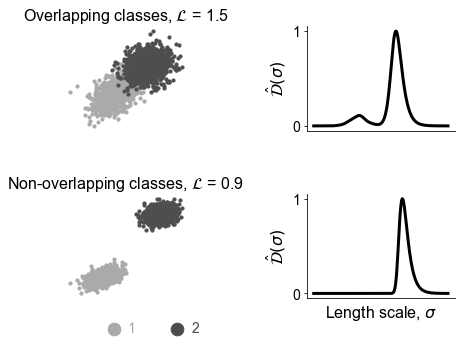

In [11]:
fig = plt.figure(figsize=(7, 5))
spec = fig.add_gridspec(ncols=3, nrows=3)
widths = [1, 0.6, 1.2]
heights = [1, 0.3, 1]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

c1 = '#aaaaaa'
c2 = '#4e4e4e'
colors = [c1, c2]

ax = fig.add_subplot(spec[0,0])
plt.scatter(close_clouds[idx==0,0], close_clouds[idx==0,1], 10, c=c1)
plt.scatter(close_clouds[idx==1,0], close_clouds[idx==1,1], 10, c=c2)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Overlapping classes, $\mathcal{L}$ = ' + str(round(cost_overlapping,1)), fontsize=16)

ax = fig.add_subplot(spec[0,2])
plt.semilogx(sigma_overlapping, derivative_overlapping['idx'], '-', color='k', lw=3, label='Overlapping classes')
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([0,1], fontsize=14)
plt.minorticks_off()

ax = fig.add_subplot(spec[2,0])
plt.scatter(distant_clouds[idx==0,0], distant_clouds[idx==0,1], 10, c=c1, label='1')
plt.scatter(distant_clouds[idx==1,0], distant_clouds[idx==1,1], 10, c=c2, label='2')
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Non-overlapping classes, $\mathcal{L}$ = ' + str(round(cost_nonoverlapping,1)), fontsize=16)
l = plt.legend(bbox_to_anchor=(1.2, -0.1), ncol=2, handletextpad=0, frameon=False, fontsize=14, markerscale=4)
for k, text in enumerate(l.get_texts()):
    text.set_color(colors[k])
    
ax = fig.add_subplot(spec[2,2])
plt.semilogx(sigma_nonoverlapping, derivative_nonoverlapping['idx'], '-', color='k', lw=3, label='Non-overlapping classes')
plt.xlabel('Length scale, $\sigma$', fontsize=16)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([0,1], fontsize=14)
plt.minorticks_off()

plt.savefig('../figures/toy-categorical-data.svg', dpi=300, bbox_inches='tight')

<a id=mnist></a>

***

## Comprison of PCA and t-SNE projections of the MNIST dataset

[Go to the top](#top-page)

In [12]:
n_components = 2
bandwidth_values = np.logspace(-7, 3, 200)
sample_data = True

In [13]:
def plot_projection(embedding, idx):

    n_clusters = len(np.unique(idx))
    populations = preprocess.get_populations(idx)

    x = embedding[:,0]
    y = embedding[:,1]

    color_map_colors = cm.get_cmap('tab10', n_clusters)
    cluster_colors = color_map_colors(np.linspace(0, 1, n_clusters))

    figure = plt.figure(figsize=(10,10))

    for k in range(0,n_clusters):
        plt.scatter(x[np.where(idx==k)], y[np.where(idx==k)], color=cluster_colors[k], marker='o', s=40, alpha=1, label=str(k))

#     l = plt.legend(bbox_to_anchor=(0.2, -0.05), ncol=10, handletextpad=0, frameon=False, fontsize=22, markerscale=4)
#     for k, text in enumerate(l.get_texts()):
#         text.set_color(cluster_colors[k])
    plt.xticks([])
    plt.yticks([])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)

    return plt

Load the MNIST handwritten digits dataset:

In [14]:
mnist = fetch_openml("mnist_784", version=1)
color = mnist.target.astype(int)
(n_observations, n_dimensions) = np.shape(mnist.data)

Perform stratified sampling on the handwritten digits to have just `n_samples` in each class:

In [15]:
n_samples = 1500

manual_samples = {}
for i in range(0,len(np.unique(color))):
    manual_samples[i] = n_samples

if sample_data:
    sample_random = preprocess.DataSampler(color, random_seed=random_seed, verbose=True)
    (idx_sample, _) = sample_random.manual(sampling_dictionary=manual_samples, sampling_type='number')
    X = mnist.data[idx_sample,:]
    idx = color[idx_sample]
else:
    X = mnist.data
    idx = color

Cluster 0: taking 1500 train samples out of 6903 observations (21.7%).
Cluster 1: taking 1500 train samples out of 7877 observations (19.0%).
Cluster 2: taking 1500 train samples out of 6990 observations (21.5%).
Cluster 3: taking 1500 train samples out of 7141 observations (21.0%).
Cluster 4: taking 1500 train samples out of 6824 observations (22.0%).
Cluster 5: taking 1500 train samples out of 6313 observations (23.8%).
Cluster 6: taking 1500 train samples out of 6876 observations (21.8%).
Cluster 7: taking 1500 train samples out of 7293 observations (20.6%).
Cluster 8: taking 1500 train samples out of 6825 observations (22.0%).
Cluster 9: taking 1500 train samples out of 6958 observations (21.6%).

Cluster 0: taking 5403 test samples out of 5403 remaining observations (100.0%).
Cluster 1: taking 6377 test samples out of 6377 remaining observations (100.0%).
Cluster 2: taking 5490 test samples out of 5490 remaining observations (100.0%).
Cluster 3: taking 5641 test samples out of 564

<a id=mnist-pca></a>

#### PCA on MNIST:

[Go to the top](#top-page)

In [16]:
(X_removed, idx_removed, idx_retained) = preprocess.remove_constant_vars(X)

pca = reduction.PCA(X_removed, scaling='auto', n_components=2)
PCs = pca.transform(X_removed)

In [17]:
tic = time.perf_counter()

variance_data_PCA = analysis.compute_normalized_variance(PCs,
                                                         idx[:,None],
                                                         depvar_names=['var'],
                                                         bandwidth_values=bandwidth_values)

derivative_PCA, sigma_PCA, _ = analysis.normalized_variance_derivative(variance_data_PCA)

cost_PCA = analysis.cost_function_normalized_variance_derivative(variance_data_PCA,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

('WARNING: casting training data as', <class 'float'>)
	Time it took: 2.2 minutes.
----------------------------------------


In [18]:
print(cost_PCA)

4.35447742824377


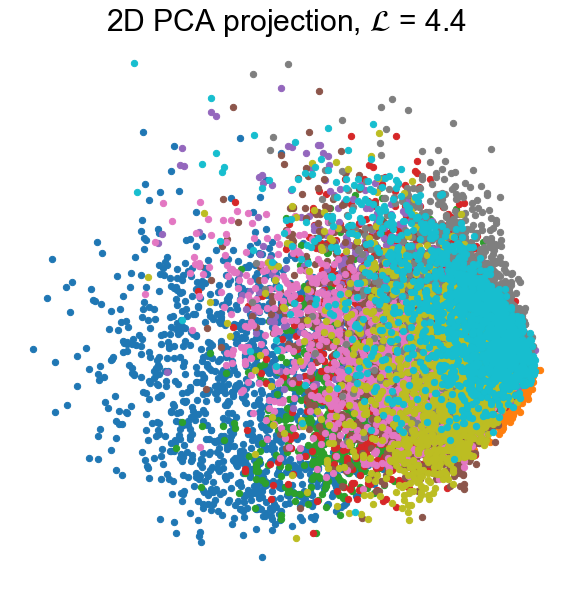

In [19]:
plt = plot_projection(PCs, idx);
plt.title('2D PCA projection, $\mathcal{L}$ = ' + str(round(cost_PCA,1)), fontsize=30)
plt.savefig('../figures/PCA-of-MNIST.png', dpi=200, bbox_inches='tight')

<a id=mnist-tsne></a>

#### t-SNE on MNIST:

[Go to the top](#top-page)

In [20]:
tic = time.perf_counter()

TSNE_embedding = manifold.TSNE(n_components=n_components, init="random", random_state=random_seed).fit_transform(X)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 5.9 minutes.
----------------------------------------


In [21]:
tic = time.perf_counter()

variance_data_TSNE = analysis.compute_normalized_variance(TSNE_embedding,
                                                          idx[:,None],
                                                          depvar_names=['var'],
                                                          bandwidth_values=bandwidth_values)

derivative_TSNE, sigma_TSNE, _ = analysis.normalized_variance_derivative(variance_data_TSNE)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

('WARNING: casting training data as', <class 'float'>)
	Time it took: 2.0 minutes.
----------------------------------------


In [22]:
cost_TSNE = analysis.cost_function_normalized_variance_derivative(variance_data_TSNE,
                                                                  penalty_function=penalty,
                                                                  power=power,
                                                                  norm=norm,
                                                                  integrate_to_peak=False)

In [23]:
print(cost_TSNE)

1.6717970261225612


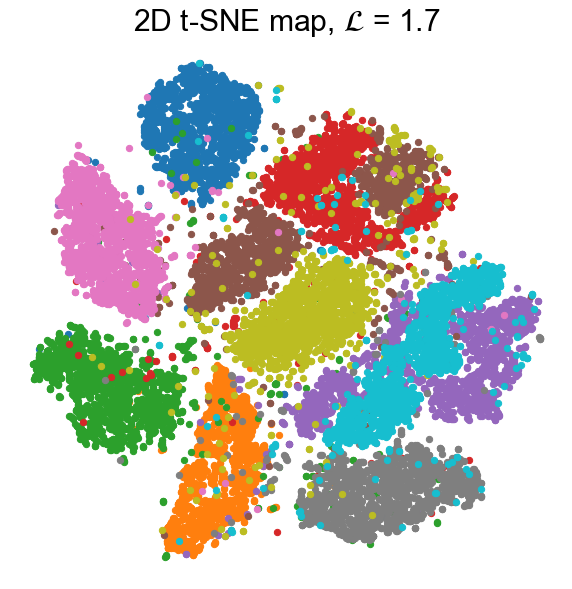

In [24]:
plt = plot_projection(TSNE_embedding, idx);
plt.title('2D t-SNE map, $\mathcal{L}$ = ' + str(round(cost_TSNE,1)), fontsize=30)
plt.savefig('../figures/t-SNE-of-MNIST.png', dpi=200, bbox_inches='tight')

<a id=mnist-D-hat></a>

#### Plot $\hat{\mathcal{D}}(\sigma)$ comparison:

[Go to the top](#top-page)

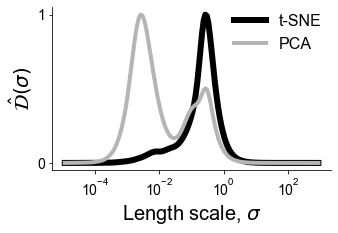

In [25]:
derivative_PCA, sigma_PCA, _ = analysis.normalized_variance_derivative(variance_data_PCA)
derivative_TSNE, sigma_TSNE, _ = analysis.normalized_variance_derivative(variance_data_TSNE)

fig = plt.figure(figsize=(5, 3))
color_map_colors = cm.get_cmap('Greys')
colors = np.flipud(color_map_colors(np.linspace(0.4, 1, 2)))

plt.semilogx(sigma_TSNE[40::], derivative_TSNE['var'][40::], '-', color=colors[0], lw=6, label='t-SNE')
plt.semilogx(sigma_PCA[40::], derivative_PCA['var'][40::], '-', color=colors[1], lw=4, label='PCA')
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks([0,1], fontsize=14)
plt.minorticks_off()
plt.legend(ncol=1, fontsize=16, frameon=False, bbox_to_anchor=(0.6,1.05))
plt.savefig('../figures/MNIST-D-hat.svg', dpi=200, bbox_inches='tight')

***